In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for interactive graphs
import sklearn

# For applying the algorithms and prepare the results

In [32]:
data = pd.read_csv("D:\\Dataset\\creditcardfraud\\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [65]:
# check for Null Values.
data.isnull().sum().max()

0

## Exploratory Data Analysis

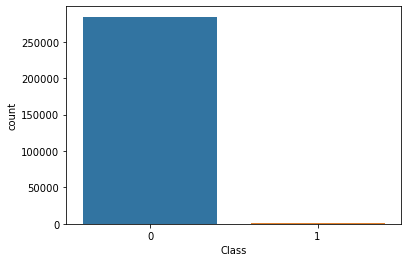

In [34]:
# class distribution
sns.countplot("Class", data=data)

The above graph clearly shows that the data is highly imbalance. Let us check the counts of valid and fraud transactions

In [35]:
valid_transactions = data[data['Class']==0]
fraud_transactions = data[data['Class']==1]
print(f'Total number of valid transactions: {len(valid_transactions)}')
print(f'Total number of fraud transactions: {len(fraud_transactions)}')

Total number of valid transactions: 284315
Total number of fraud transactions: 492


In [36]:
# useful information about the data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [37]:
valid_transactions.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [38]:
fraud_transactions.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

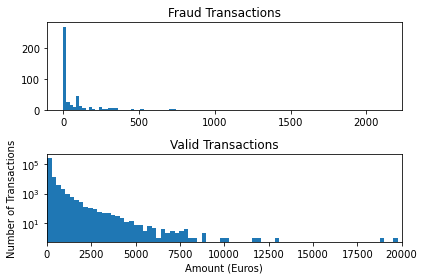

In [60]:
fig, (ax1, ax2) = plt.subplots(2, 1)
bins = 100
ax1.hist(fraud_transactions.Amount, bins = bins)
ax1.set_title('Fraud Transactions')
ax2.hist(valid_transactions.Amount, bins = bins)
ax2.set_title('Valid Transactions')
plt.xlabel('Amount (Euros)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.tight_layout()
plt.show()

The mean of the valid transactions is 88.29 Euros whereas the median(50% percentile) is 22 Euros. Likewise, the mean of fraud transactions is 122.21 Euros and the median is 9.25 Euros. Both of the transaction plots look right-skewed(right-tailed) that's why mean is higher than the median value. It looks strange that the maximum value of fraud transaction is only 2125.87 Euros however the valid one is 25K Euros.

Next, we analyze more about the transaction time against the withdrawal amounts.

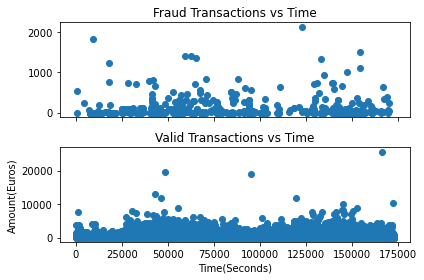

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.scatter(fraud_transactions.Time, fraud_transactions.Amount)
ax1.set_title("Fraud Transactions vs Time")
ax2.scatter(valid_transactions.Time, valid_transactions.Amount)
ax2.set_title("Valid Transactions vs Time")
plt.xlabel("Time(Seconds)")
plt.ylabel("Amount(Euros)")
plt.tight_layout()
plt.show()

Both fraud and valid transactions follow multi-modal distribution. It's hard to differentiate the classes based only upon the time and amount features.

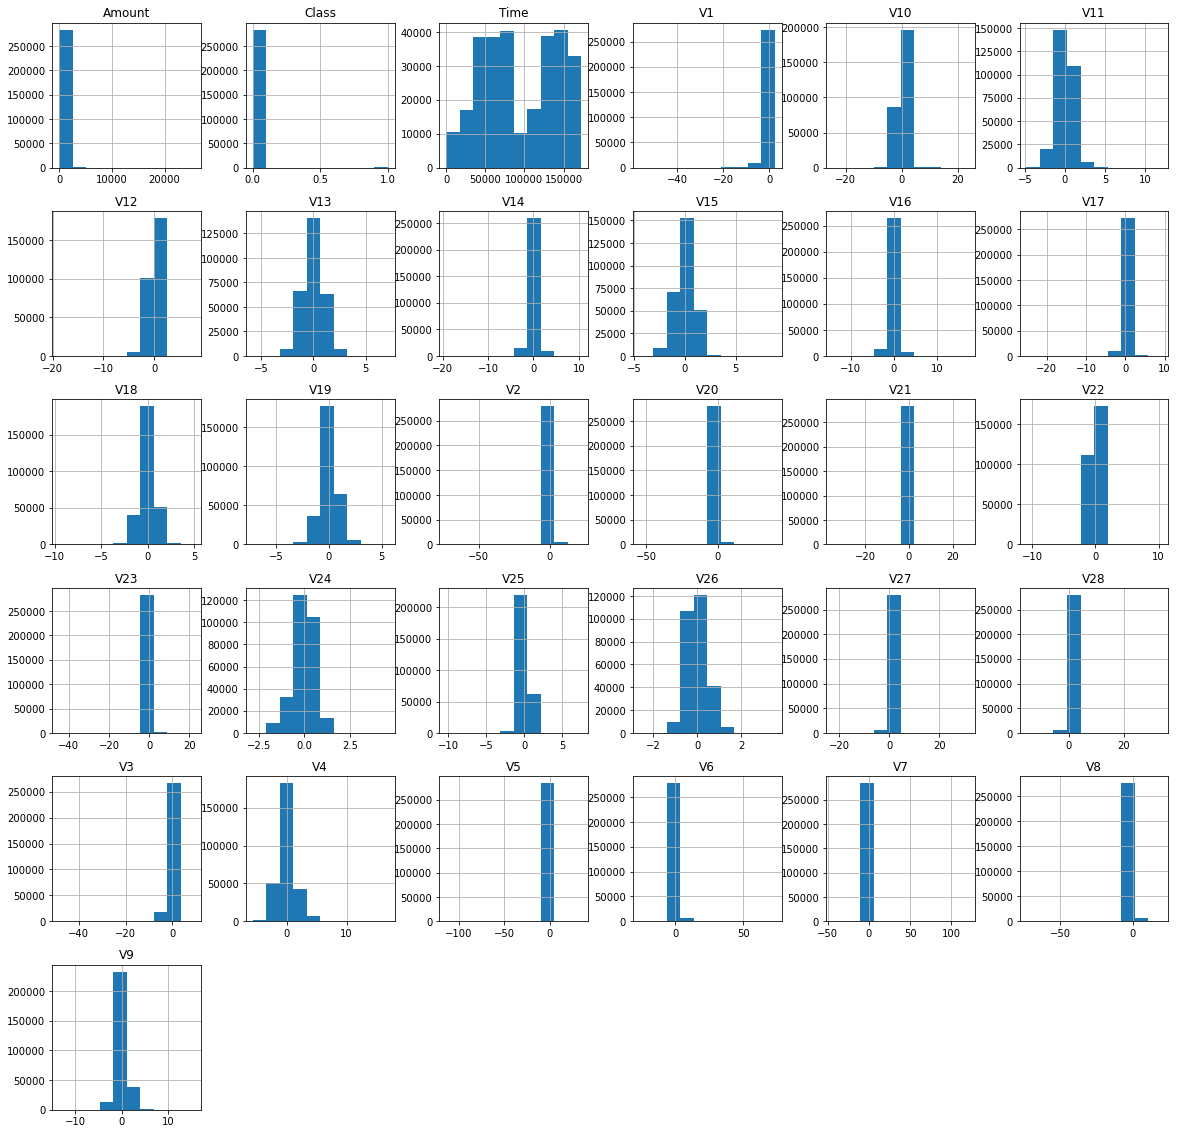

In [23]:
# plot the histogram of each parameter
data.hist(figsize=(20,20))
plt.show()

From the histogram plot, it is clear that the features from (V1-V28) are centered around zero mean due to PCA transformation. Therefore, the other features such as 'Time' and 'Amount' have to do the feature scaling before feeding the data to the machine learning models.

In [ ]:
# Robust scaler
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#robustscaler

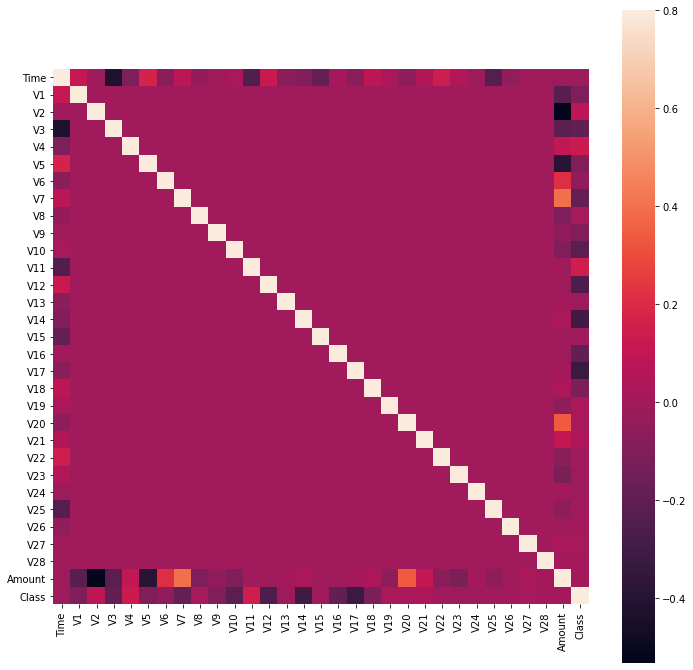

In [27]:
# correlation matrix is used to find the correlation between the features using heatmap

correlation_mat = data.corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(correlation_mat, vmax=0.8, square=True)
plt.show()

From the centre of heat map, we can see that the features(v1-v28) are not correlated.Therefore, we don't have to further reduce the dimensionality of the data. If we see the Class row, some of the features such as v12, v14, v17 are negatively correlated whereas the features such as v2 and v11 are positively correlated.

In [ ]:
# Correlation matrix after scaling

In [30]:
# Get all the columns from the dataframe
columns = data.columns.tolist()

# filter the column we want to predict
target = "Class"
columns = [c for c in columns if c not in target]
X = data[columns]
Y = data[target]
print(f'The shape of training data: {X.shape}')
print(f'The shape of Class label  : {Y.shape}')

The shape of training data: (284807, 30)
The shape of Class label  : (284807,)


In [ ]:
# Stratified sampling - split

To my intuition, the model won't classify the data if the max value of Fraud is above 25k Euros.